# Introduction

### - The main goal of this project is analyze how the "space race" scenario changed over the years, from 1957 to 2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('mission_launches.csv',thousands=',')
# source: nextspaceflight.com 

## Data Cleaning and Exploration

In [4]:
df.head()

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

In [5]:
df = df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [7]:
df.describe().transpose()

count   mean    std  min   25%   50%    75%      max
Price 964.00 153.79 288.45 5.30 40.00 62.00 164.00 5,000.00

In [8]:
df['Date'].head()

0    Fri Aug 07, 2020 05:12 UTC
1    Thu Aug 06, 2020 04:01 UTC
2    Tue Aug 04, 2020 23:57 UTC
3    Thu Jul 30, 2020 21:25 UTC
4    Thu Jul 30, 2020 11:50 UTC
Name: Date, dtype: object

In [9]:
df['Day_Week'] = df['Date'].apply(lambda x:x.split(" ")[0])

In [10]:
df['Month'] = df['Date'].apply(lambda x:x.split(" ")[1])

In [11]:
df['Day_Number'] = df['Date'].apply(lambda x:x.split(" ")[2][:-1])

In [12]:
df['Year'] = df['Date'].apply(lambda x:x.split(" ")[3])

In [13]:
df['UTC_Hour']  = df['Date'].apply(lambda x:x.split(" ")[-2])

In [14]:
df[df.duplicated()]

Organisation                                           Location  \
793         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   

                           Date                                      Detail  \
793  Wed Nov 05, 2008 00:15 UTC  Long March 2D | Shiyan-3 & Chuangxin-1(02)   

    Rocket_Status  Price Mission_Status Day_Week Month Day_Number  Year  \
793  StatusActive  29.75        Success      Wed   Nov         05  2008   

    UTC_Hour  
793    00:15

In [15]:
df = df.drop(index=793,axis=0)

## Visualization Analysis

#### 
* Mission's Price per Year

In [16]:
df_yearly_price = df[['Price','Year']].groupby(['Year']).sum()

In [17]:
df_yearly_price = df_yearly_price[df_yearly_price['Price'] > 0]

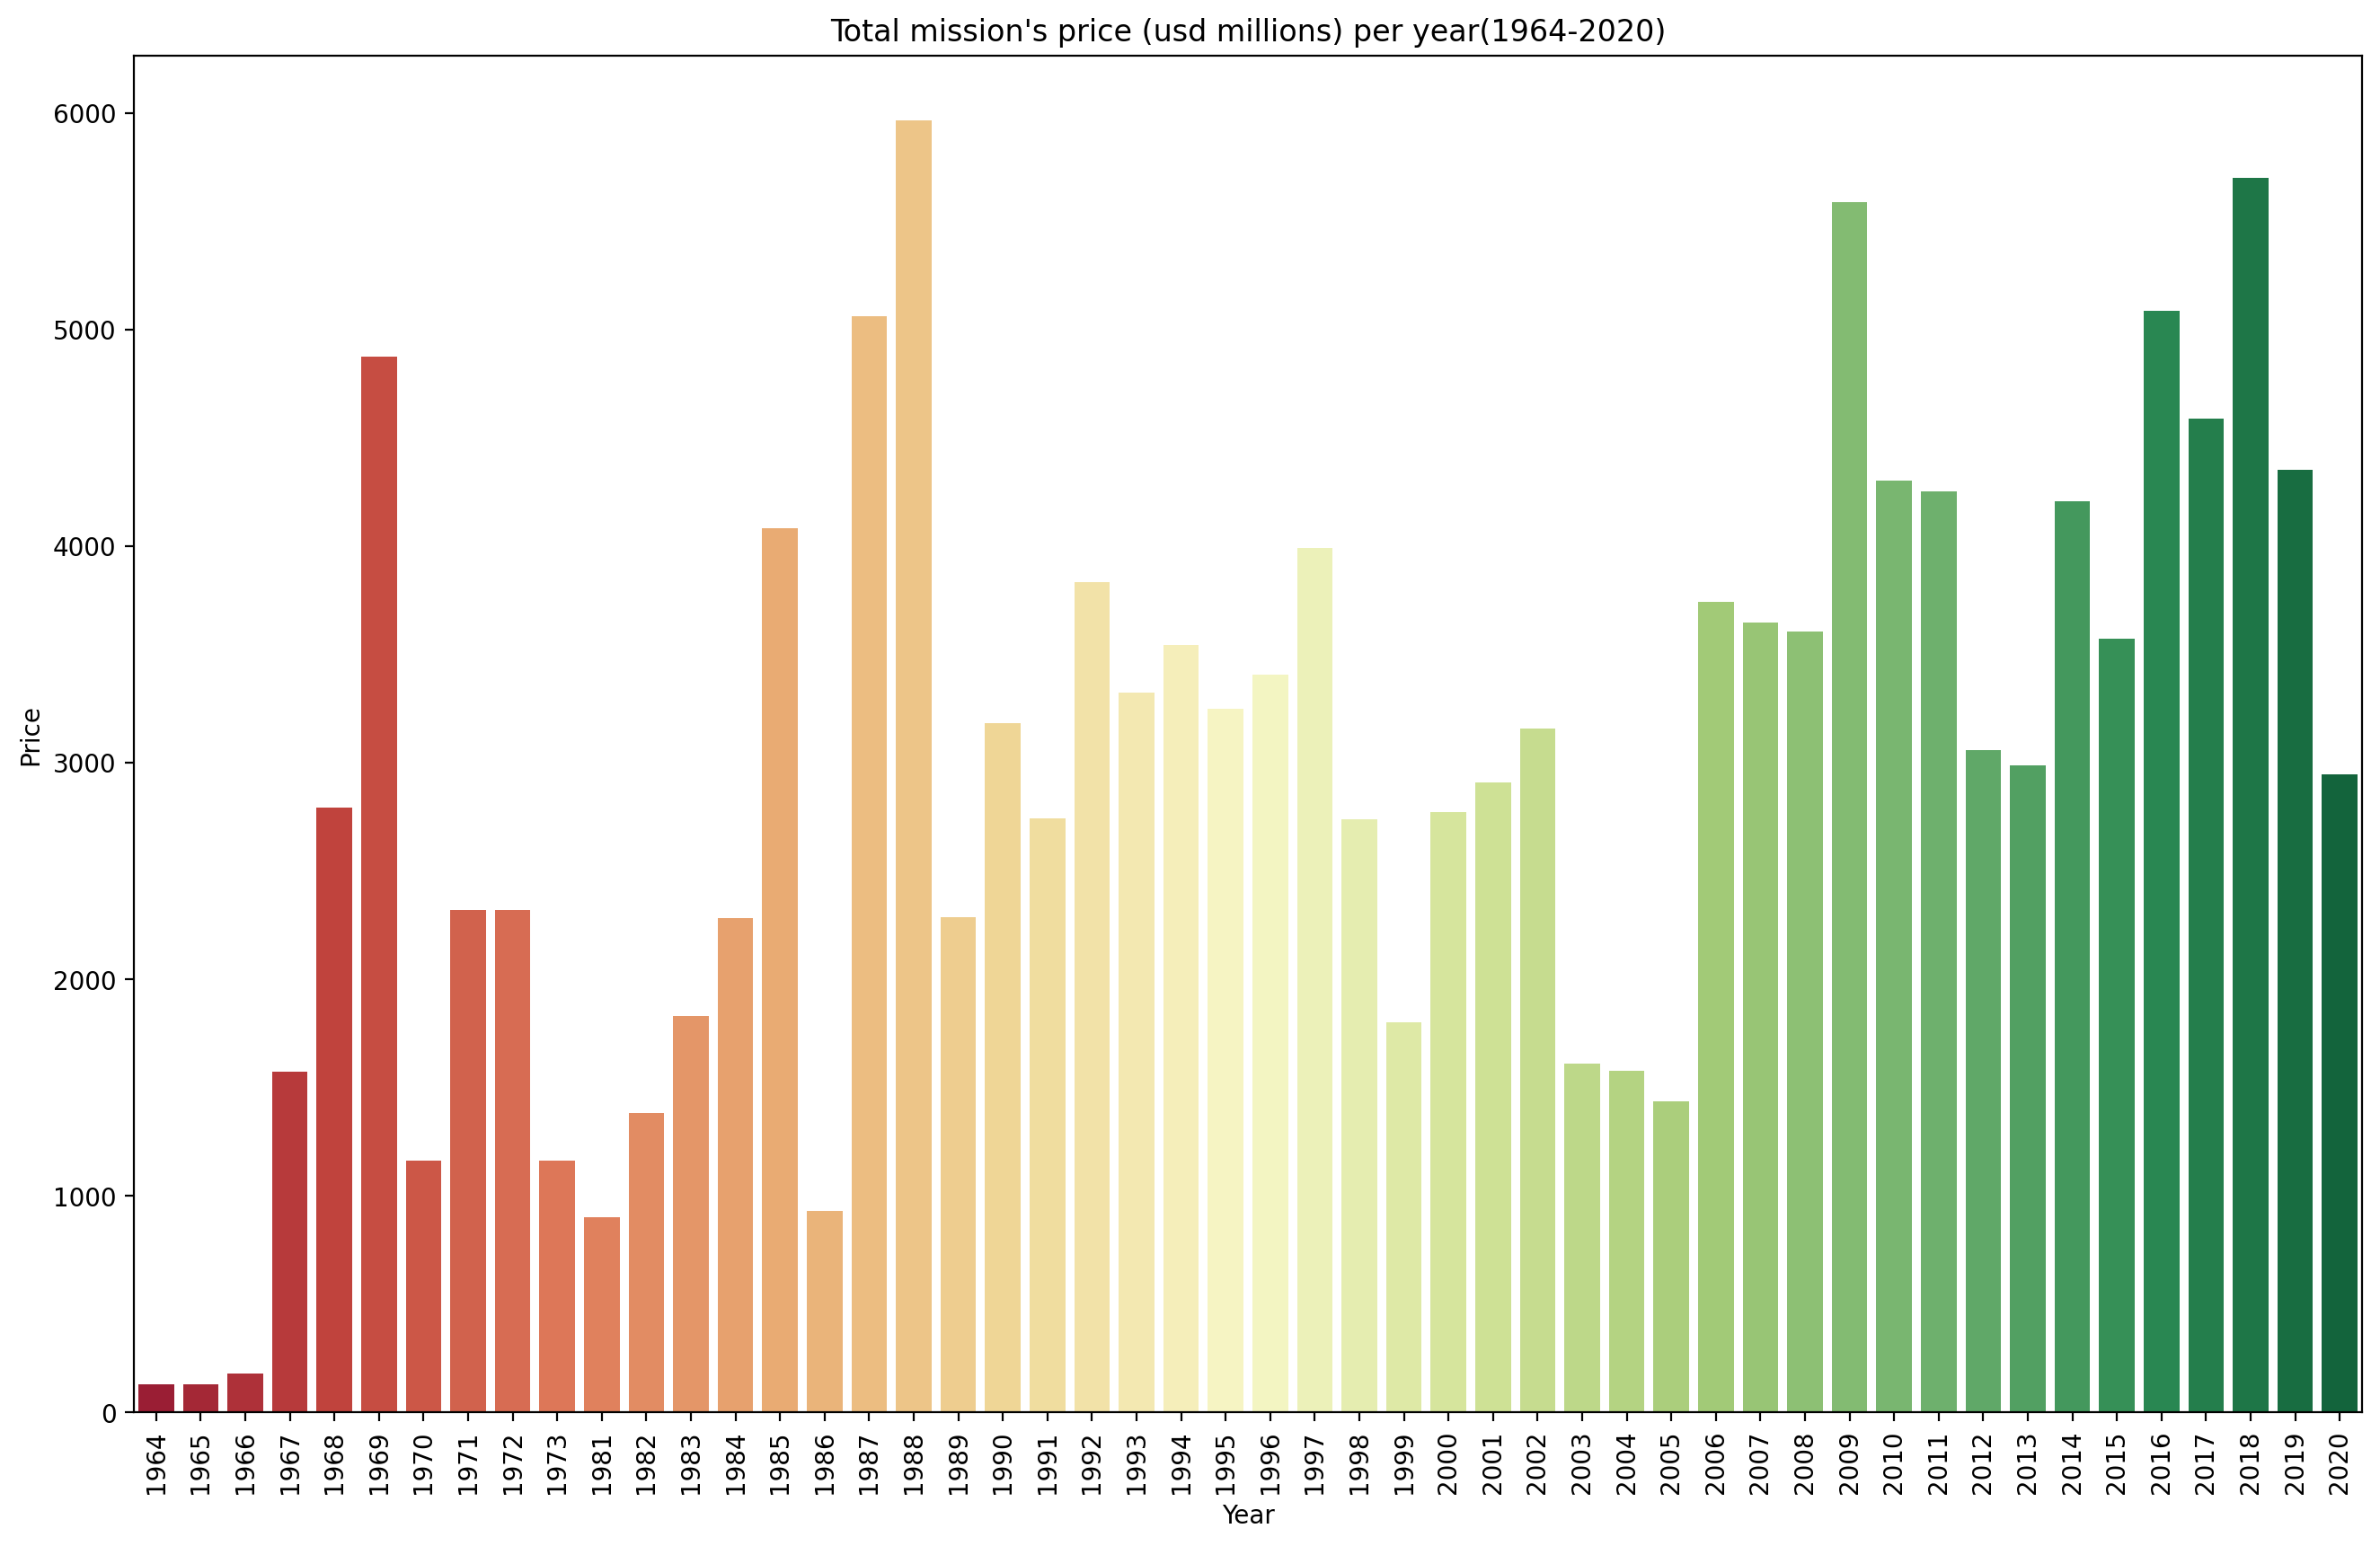

In [18]:
plt.figure(figsize=(16,10),dpi=200)
sns.barplot(data=df_yearly_price,x=df_yearly_price.index,y= df_yearly_price['Price'],palette='RdYlGn')
plt.xticks(rotation=90)
plt.title("Total mission's price (usd millions) per year(1964-2020)");

### 
* Number of Launches per year

In [19]:
df_launches_year = df.groupby('Year').size()

df_launches_year = pd.DataFrame(data=df_launches_year, columns=['Total Number of Launches']).reset_index()

In [20]:
df_launches_year

Year  Total Number of Launches
0   1957                         3
1   1958                        28
2   1959                        20
3   1960                        39
4   1961                        52
..   ...                       ...
59  2016                        90
60  2017                        92
61  2018                       117
62  2019                       109
63  2020                        63

[64 rows x 2 columns]

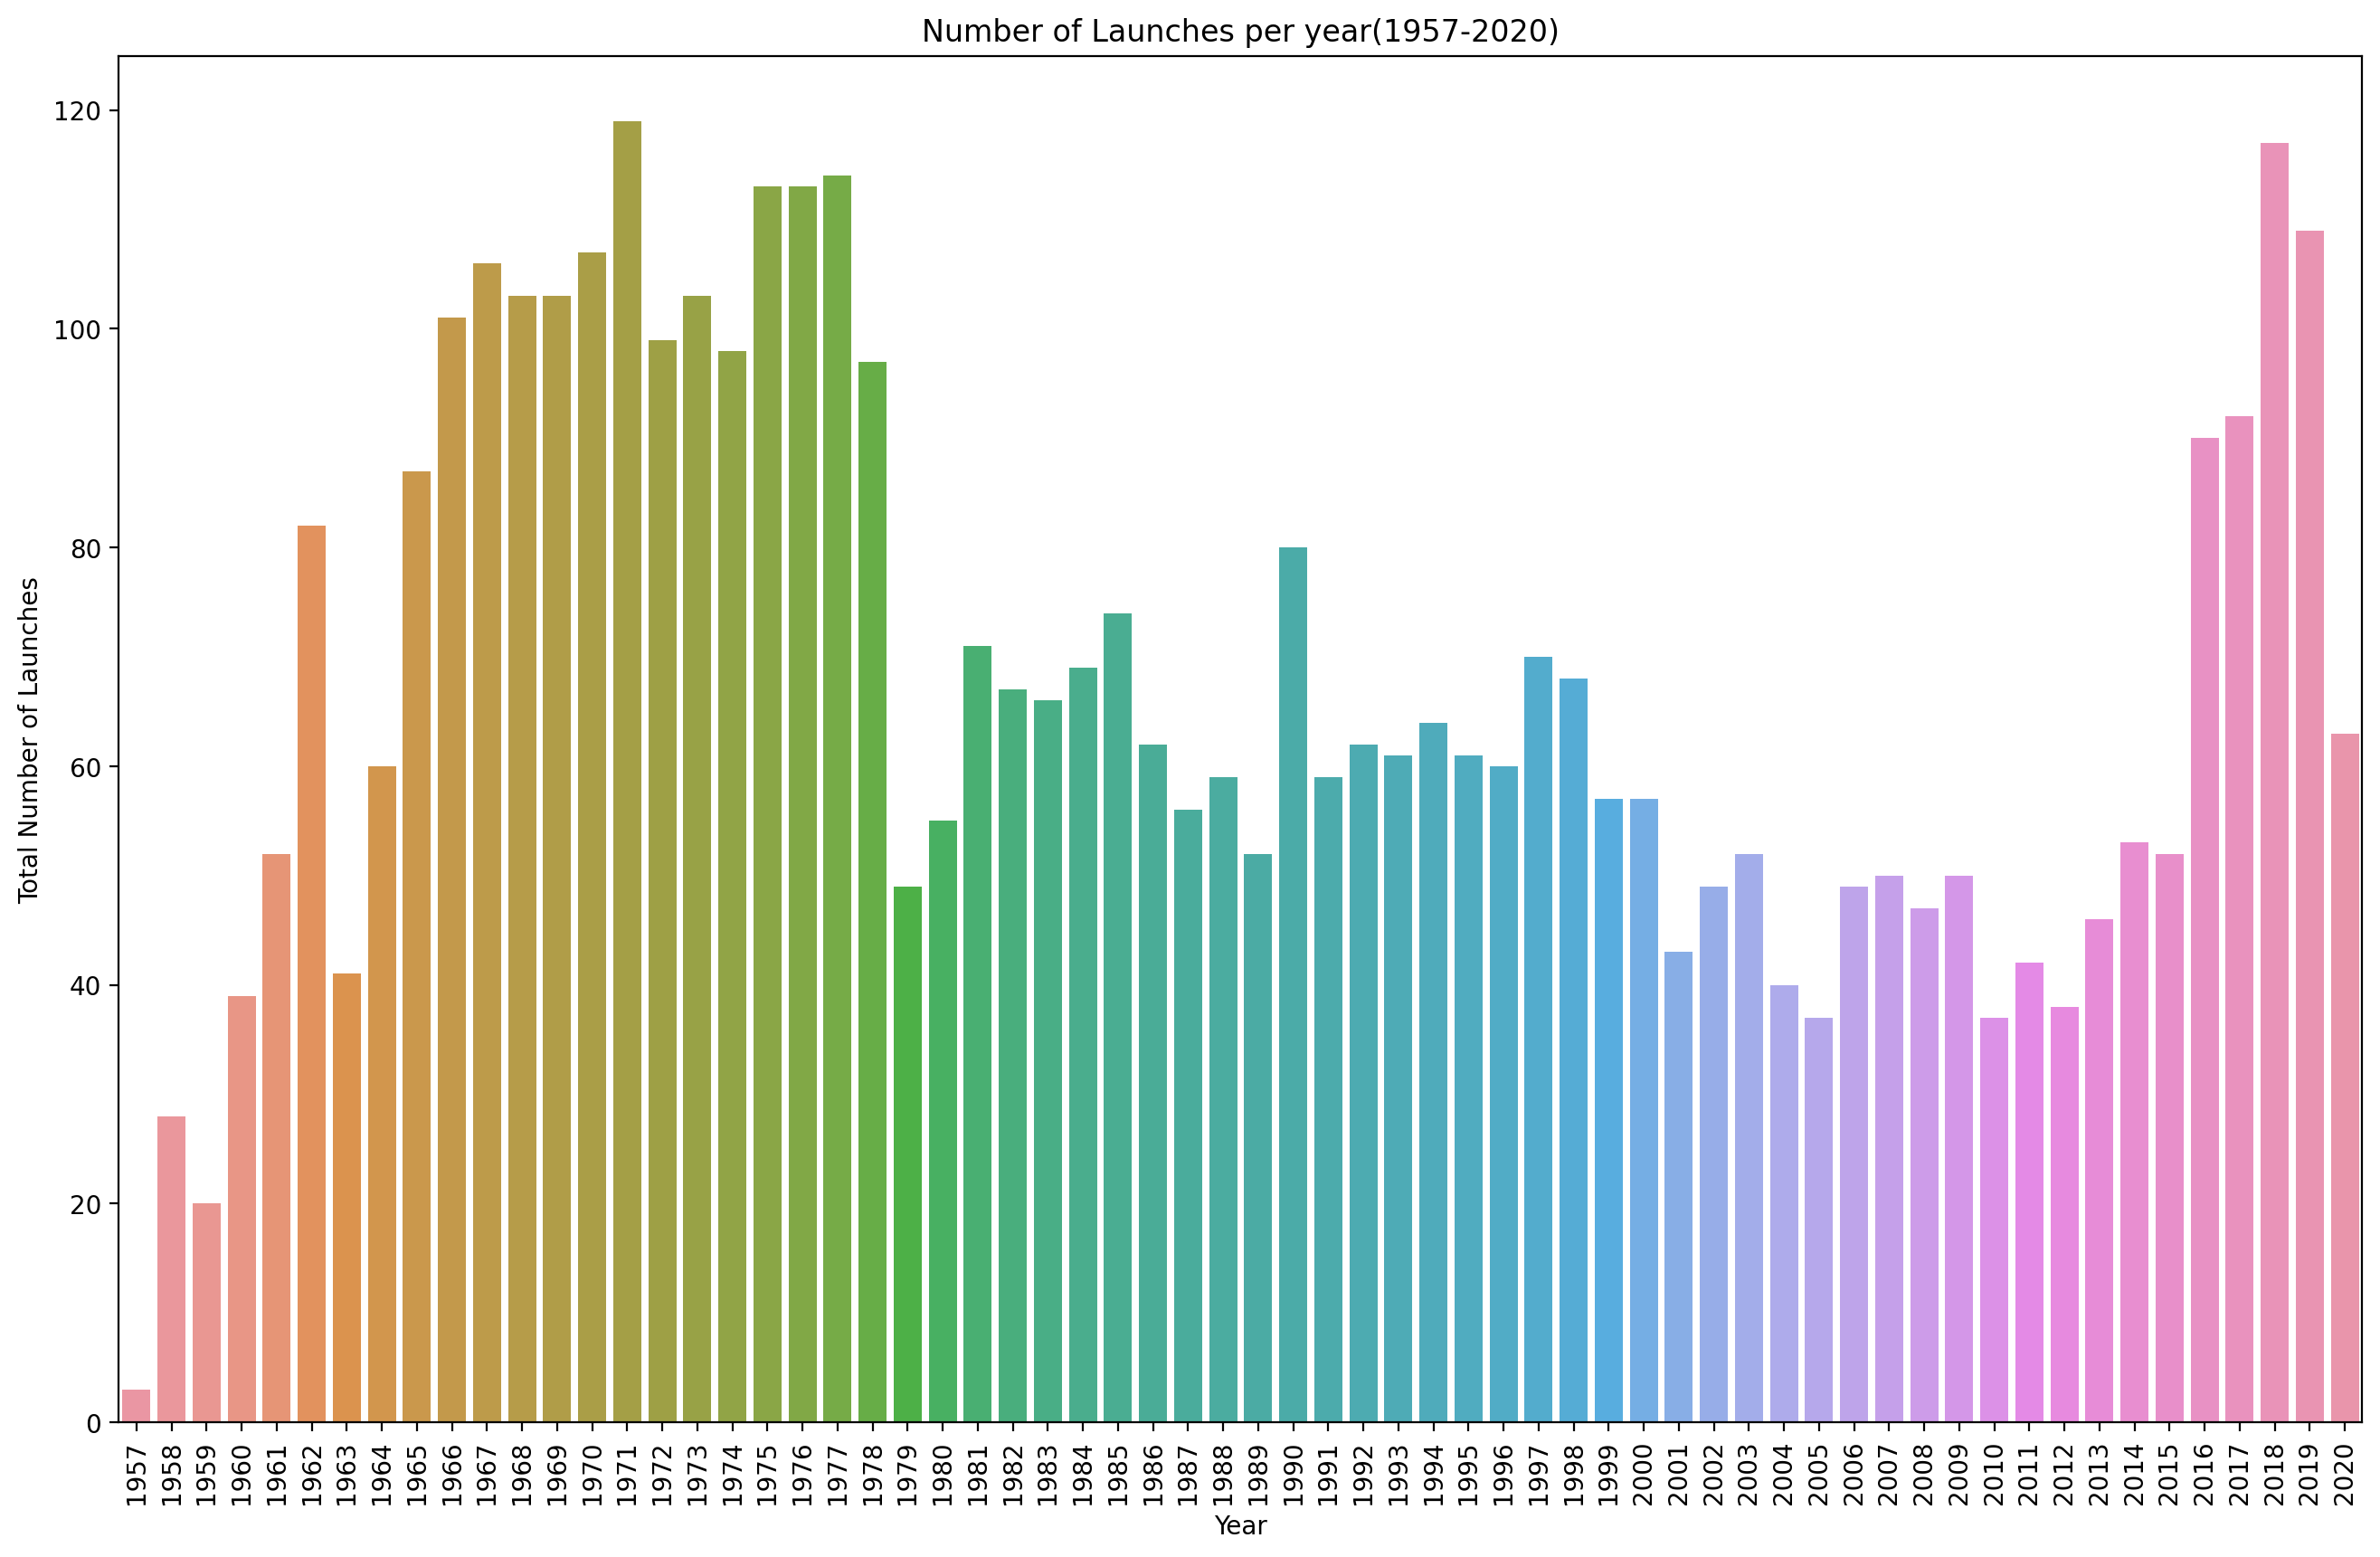

In [21]:
plt.figure(figsize=(16,10),dpi=200)
sns.barplot(x='Year',y='Total Number of Launches',data=df_launches_year)
plt.xticks(rotation=90)
plt.title("Number of Launches per year(1957-2020)");

#### 
*  Number of Launches per Company

In [22]:
df_launches = df.groupby('Organisation').size()

In [23]:
df.groupby('Organisation').size()

Organisation
AEB                    3
AMBA                   8
ASI                    9
Arianespace          279
Arm??e de l'Air        4
Blue Origin           12
Boeing               136
CASC                 250
CASIC                  5
CECLES                 4
CNES                   8
Douglas                1
EER                    1
ESA                   13
Eurockot              13
ExPace                10
Exos                   4
General Dynamics     251
IAI                   11
ILS                   46
IRGC                   1
ISA                   13
ISAS                  30
ISRO                  76
JAXA                   7
KARI                   3
KCST                   5
Khrunichev             1
Kosmotras             22
Land Launch            7
Landspace              1
Lockheed              79
MHI                   84
MITT                   7
Martin Marietta      114
NASA                 203
Northrop              83
OKB-586                2
OneSpace               1
RAE         

In [24]:
df_launches = pd.DataFrame(data=df_launches, columns=['Total Number of Launches']).reset_index()

In [25]:
df_launches

Organisation  Total Number of Launches
0                AEB                         3
1               AMBA                         8
2                ASI                         9
3        Arianespace                       279
4    Arm??e de l'Air                         4
5        Blue Origin                        12
6             Boeing                       136
7               CASC                       250
8              CASIC                         5
9             CECLES                         4
10              CNES                         8
11           Douglas                         1
12               EER                         1
13               ESA                        13
14          Eurockot                        13
15            ExPace                        10
16              Exos                         4
17  General Dynamics                       251
18               IAI                        11
19               ILS                        46
20              IRGC                         1
21               ISA                        13
22              ISAS                        30
23              ISRO                        76
24              JAXA                         7
25              KARI                         3
26              KCST                         5
27        Khrunichev                         1
28         Kosmotras                        22
29       Land Launch                         7
30         Landspace                         1
31          Lockheed                        79
32               MHI                        84
33              MITT                         7
34   Martin Marietta                       114
35              NASA                       203
36          Northrop                        83
37           OKB-586                         2
38          OneSpace                         1
39               RAE                         2
40         RVSN USSR                      1777
41        Rocket Lab                        13
42         Roscosmos                        55
43               SRC                         3
44            Sandia                         1
45        Sea Launch                        36
46            SpaceX                       100
47           Starsem                         1
48               ULA                       140
49      US Air Force                       161
50           US Navy                        17
51                UT                         5
52            VKS RF                       201
53      Virgin Orbit                         1
54          Yuzhmash                         2
55           i-Space                         1

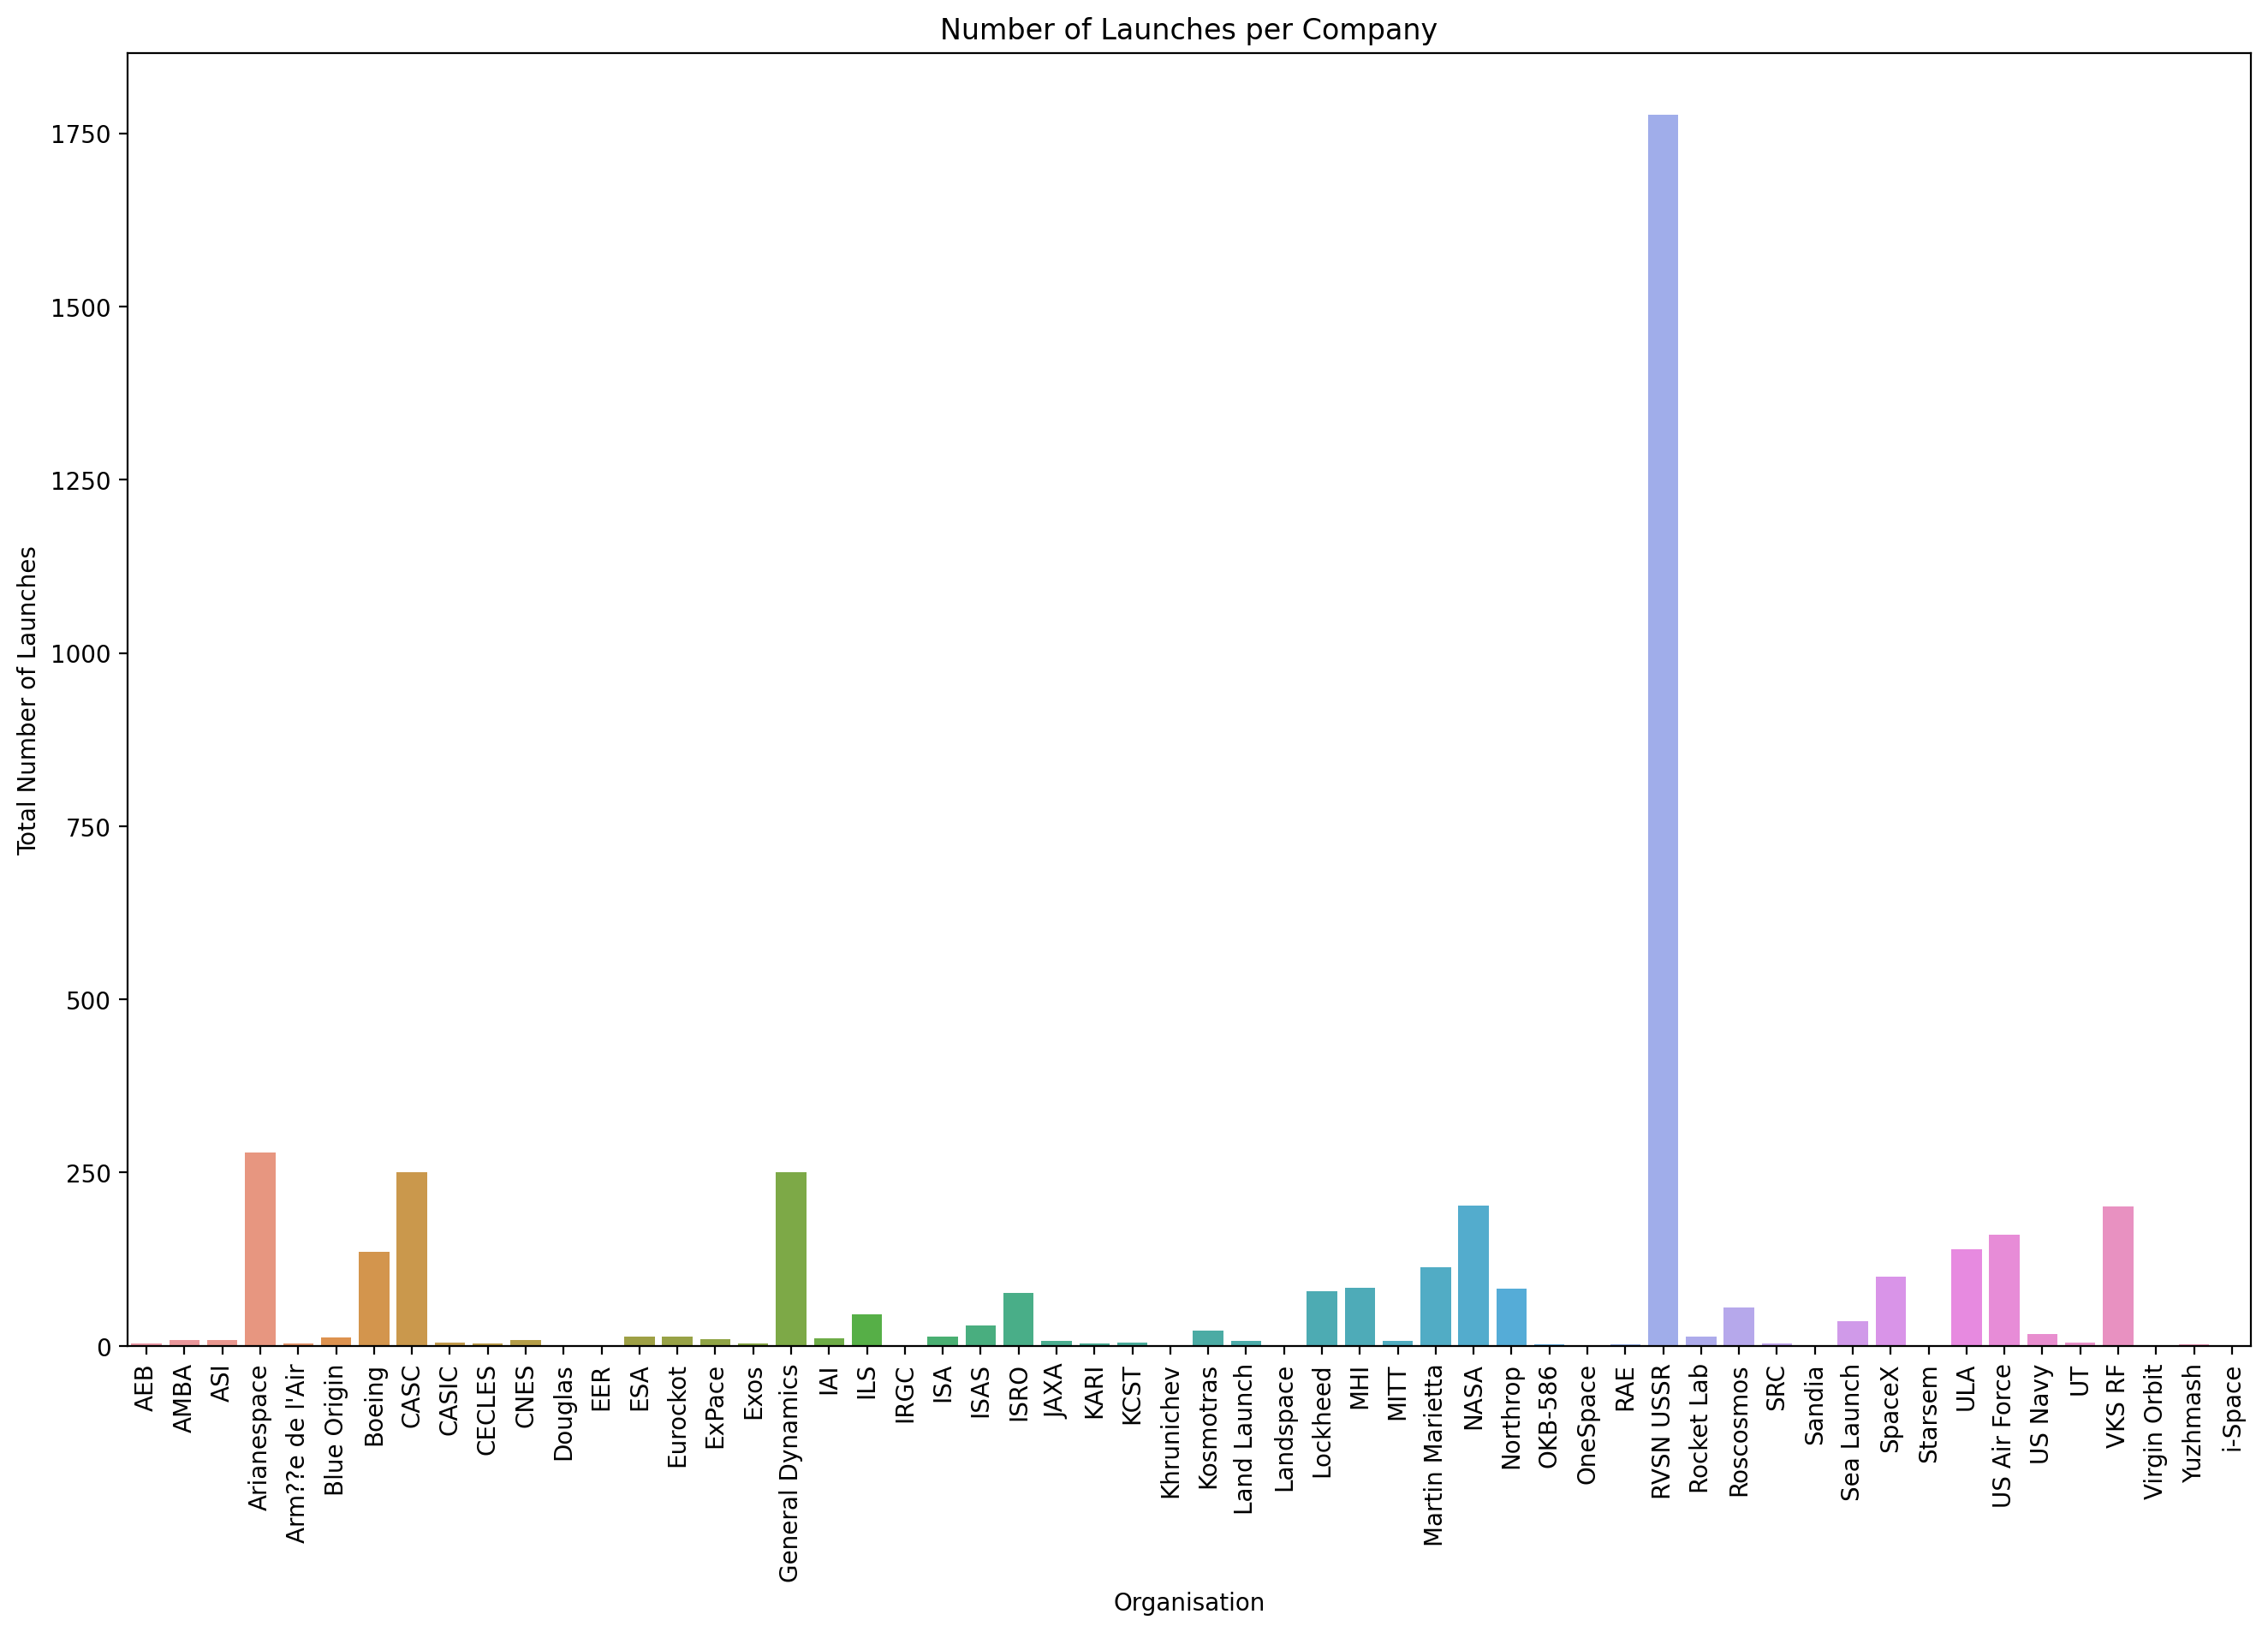

In [26]:
plt.figure(figsize=(16,10),dpi=200)
sns.barplot(x='Organisation',y='Total Number of Launches',data=df_launches)
plt.xticks(rotation=90)
plt.title("Number of Launches per Company");

In [27]:
df_launches[df_launches['Total Number of Launches']<500]

Organisation  Total Number of Launches
0                AEB                         3
1               AMBA                         8
2                ASI                         9
3        Arianespace                       279
4    Arm??e de l'Air                         4
5        Blue Origin                        12
6             Boeing                       136
7               CASC                       250
8              CASIC                         5
9             CECLES                         4
10              CNES                         8
11           Douglas                         1
12               EER                         1
13               ESA                        13
14          Eurockot                        13
15            ExPace                        10
16              Exos                         4
17  General Dynamics                       251
18               IAI                        11
19               ILS                        46
20              IRGC                         1
21               ISA                        13
22              ISAS                        30
23              ISRO                        76
24              JAXA                         7
25              KARI                         3
26              KCST                         5
27        Khrunichev                         1
28         Kosmotras                        22
29       Land Launch                         7
30         Landspace                         1
31          Lockheed                        79
32               MHI                        84
33              MITT                         7
34   Martin Marietta                       114
35              NASA                       203
36          Northrop                        83
37           OKB-586                         2
38          OneSpace                         1
39               RAE                         2
41        Rocket Lab                        13
42         Roscosmos                        55
43               SRC                         3
44            Sandia                         1
45        Sea Launch                        36
46            SpaceX                       100
47           Starsem                         1
48               ULA                       140
49      US Air Force                       161
50           US Navy                        17
51                UT                         5
52            VKS RF                       201
53      Virgin Orbit                         1
54          Yuzhmash                         2
55           i-Space                         1

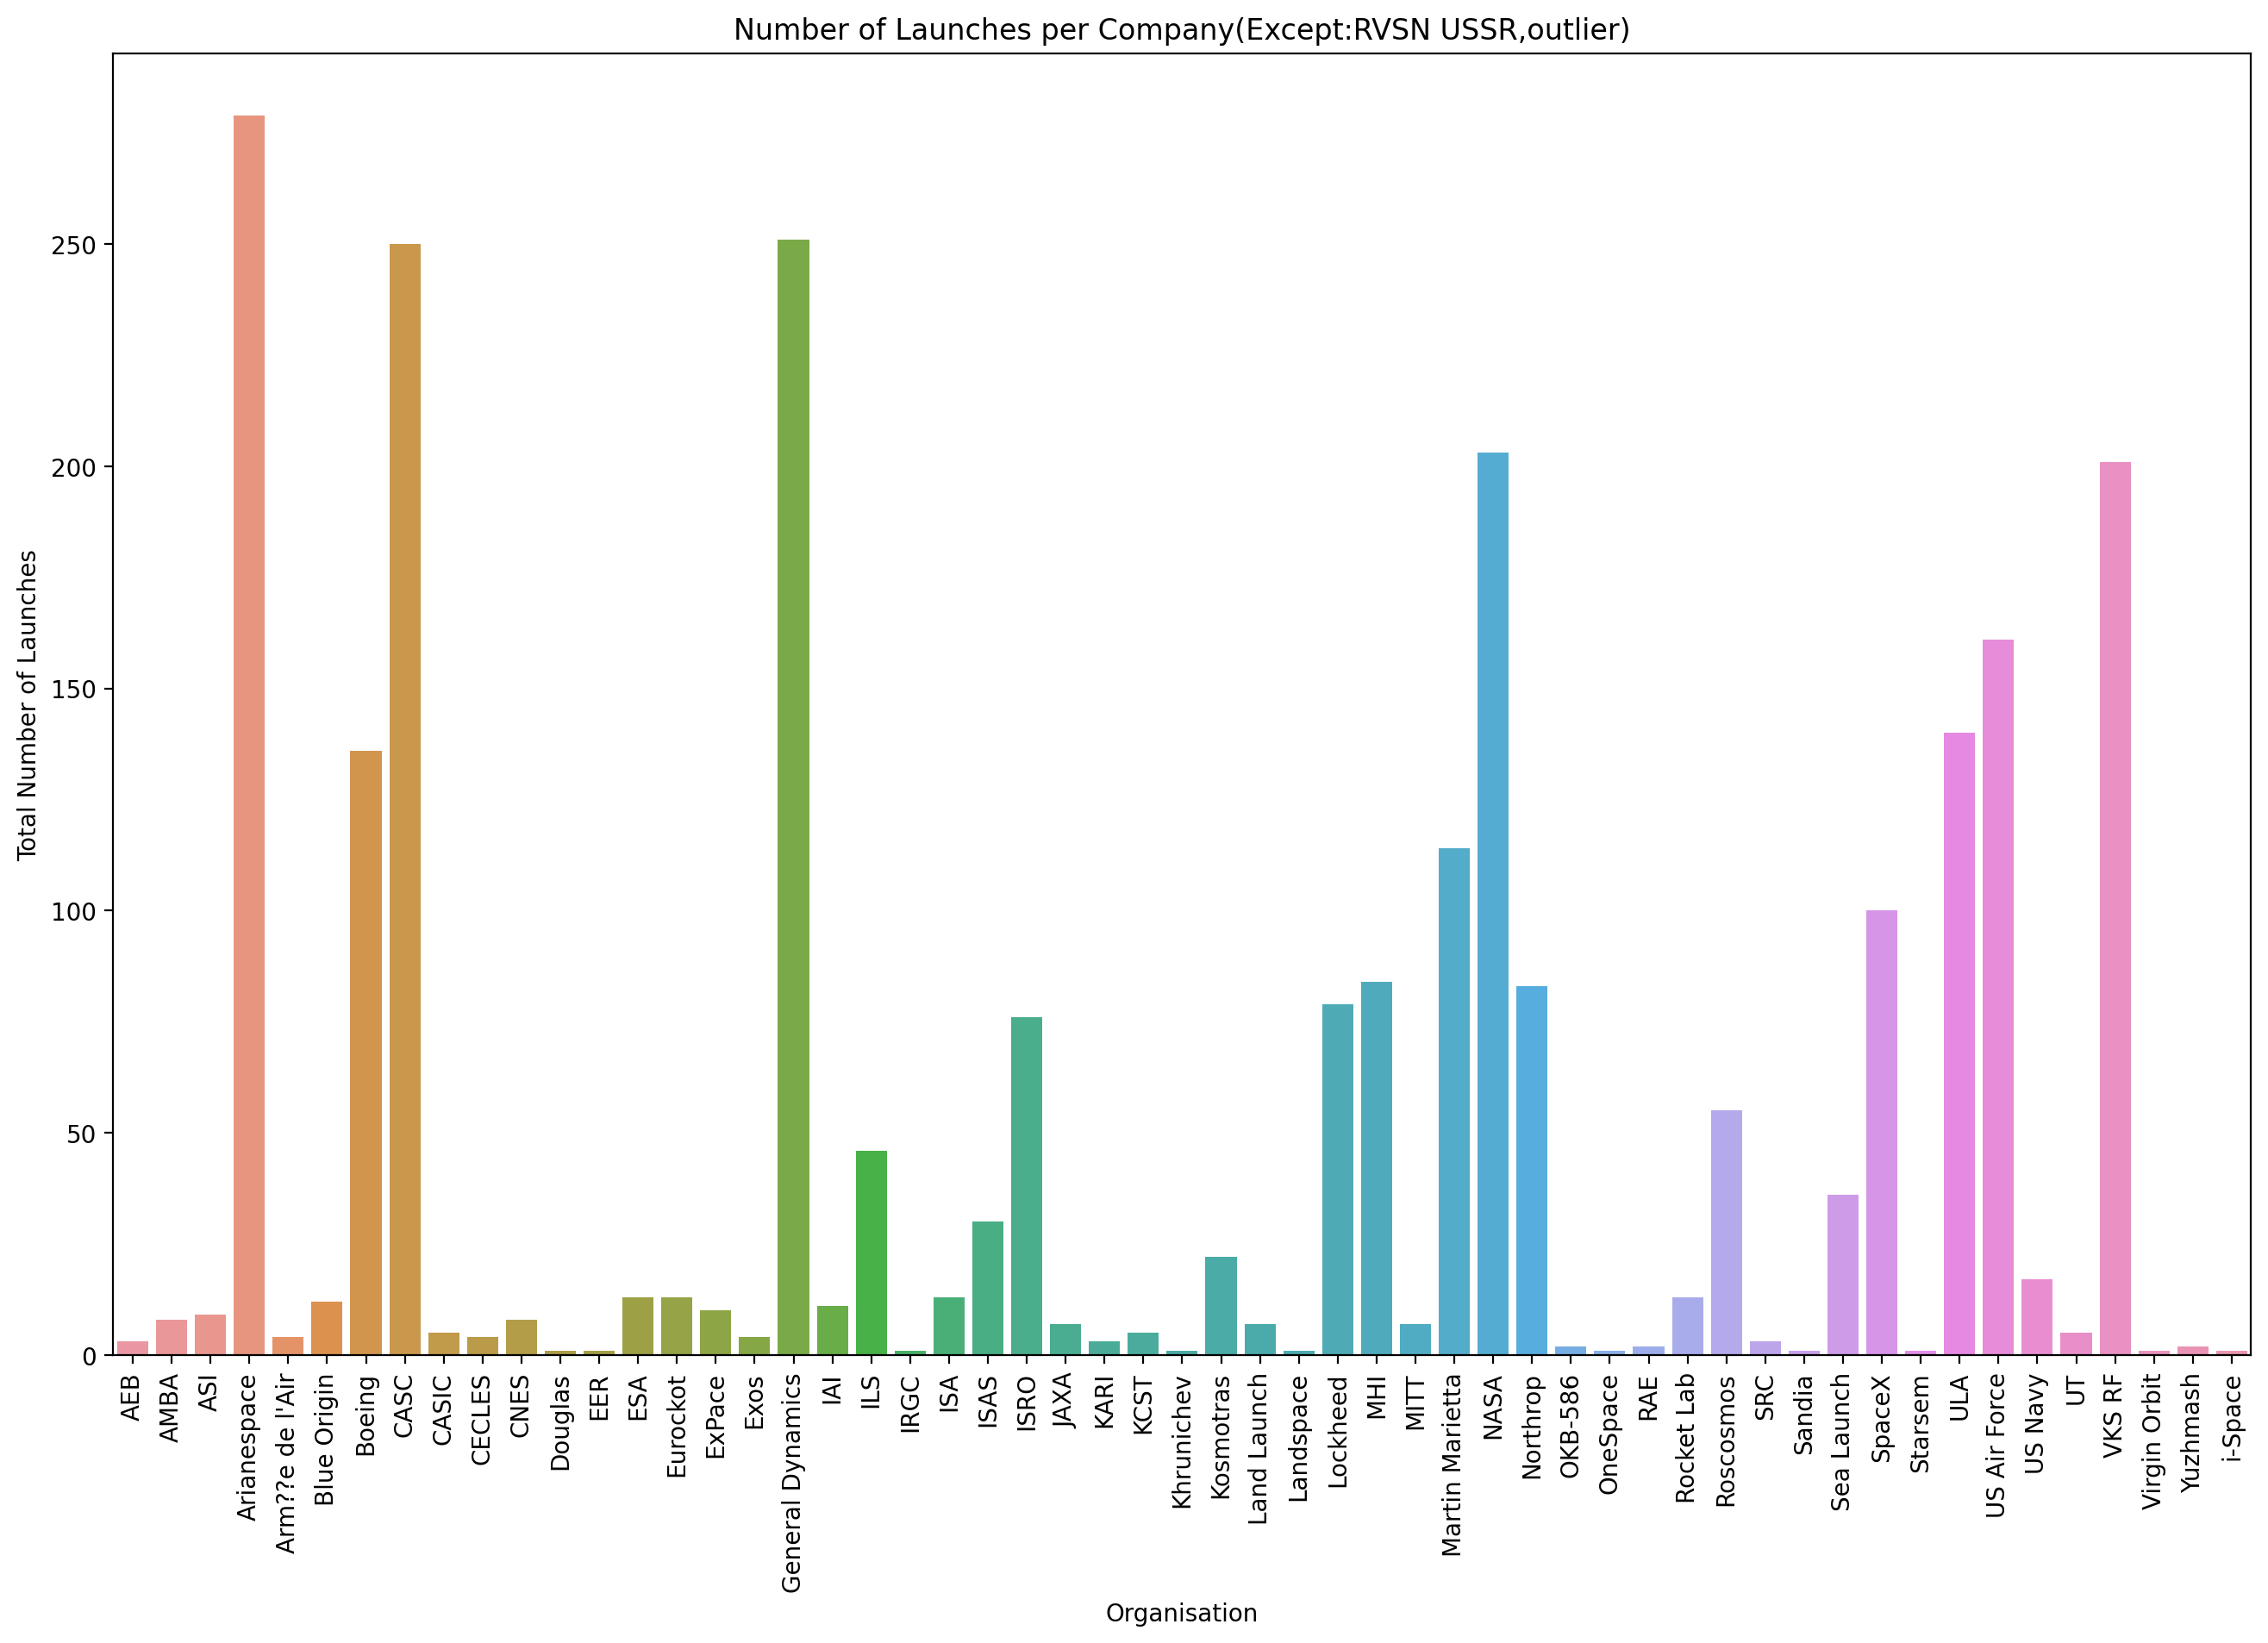

In [28]:
plt.figure(figsize=(16,10),dpi=200)
sns.barplot(x='Organisation',y='Total Number of Launches',data=df_launches[df_launches['Total Number of Launches']<500])
plt.xticks(rotation=90)
plt.title("Number of Launches per Company(Except:RVSN USSR,outlier)");

### 
* Number of Active versus Retired Rockets

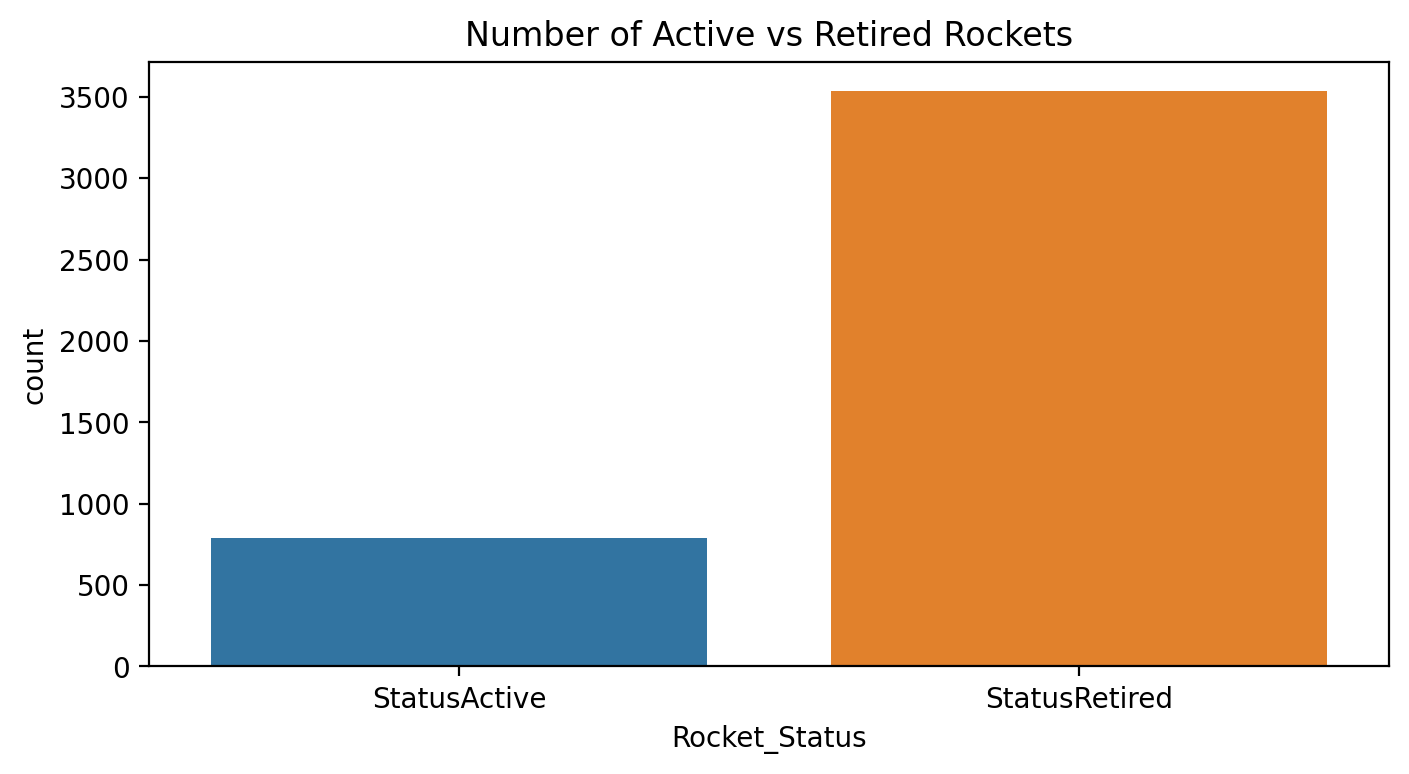

In [29]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='Rocket_Status',data=df)
plt.title("Number of Active vs Retired Rockets");

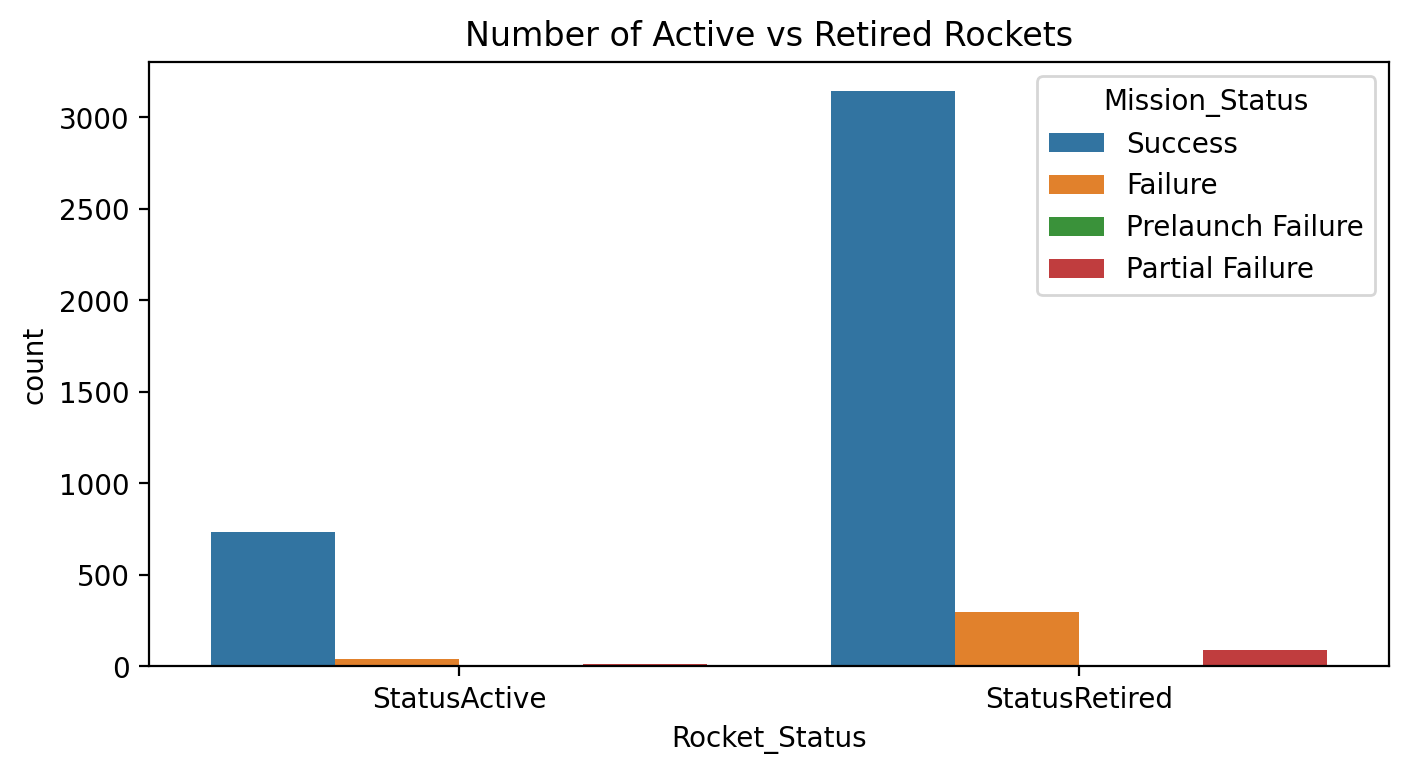

In [30]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='Rocket_Status',data=df,hue='Mission_Status')
plt.title("Number of Active vs Retired Rockets");

### 
* Distribution of Mission Status

In [31]:
df_mission_status = pd.DataFrame(data=df.groupby('Mission_Status').size(),
                                 columns=['Mission_Status_Count']).reset_index()



In [32]:
df_mission_status 

Mission_Status  Mission_Status_Count
0            Failure                   339
1    Partial Failure                   102
2  Prelaunch Failure                     4
3            Success                  3878

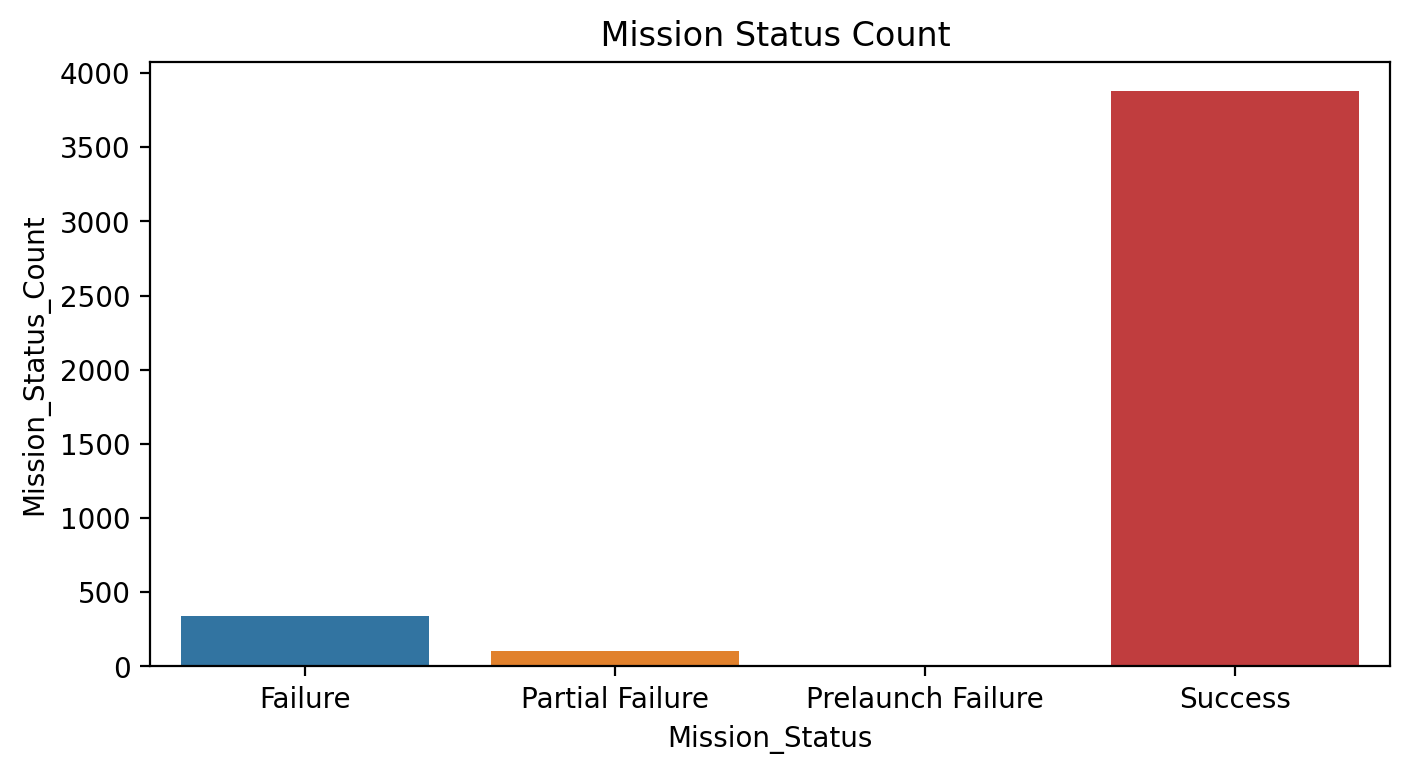

In [33]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x='Mission_Status',y='Mission_Status_Count',data=df_mission_status)
plt.title(" Mission Status Count");

### 
* Price Distribution of the Launches

In [34]:
df.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Day_Week', 'Month', 'Day_Number', 'Year',
       'UTC_Hour'],
      dtype='object')

In [35]:
df_nonnull_price =  df.dropna()

<AxesSubplot:xlabel='Price', ylabel='Count'>

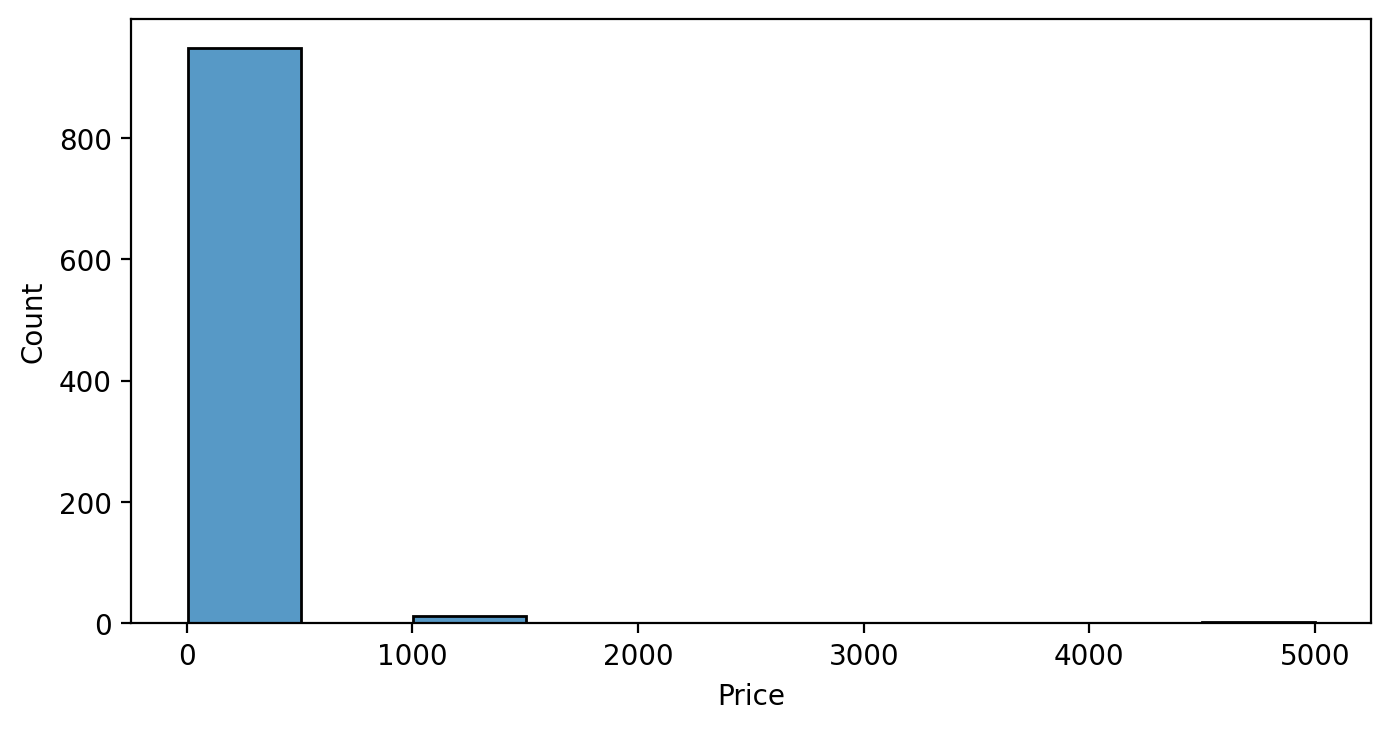

In [36]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(x='Price',data=df_nonnull_price,bins=10)

<AxesSubplot:xlabel='Price', ylabel='Count'>

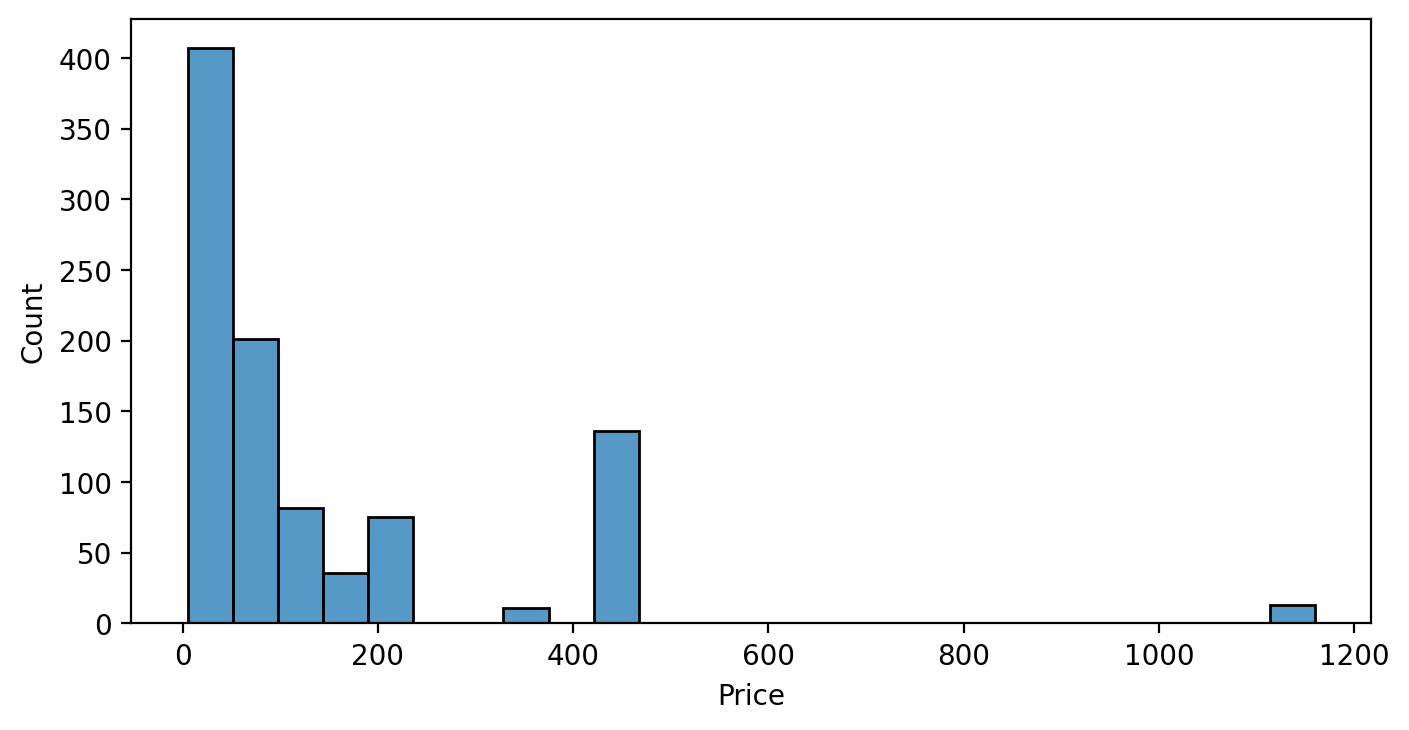

In [37]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(x='Price',data=df_nonnull_price[df_nonnull_price['Price']<1500],bins=25)

<AxesSubplot:xlabel='Price', ylabel='Count'>

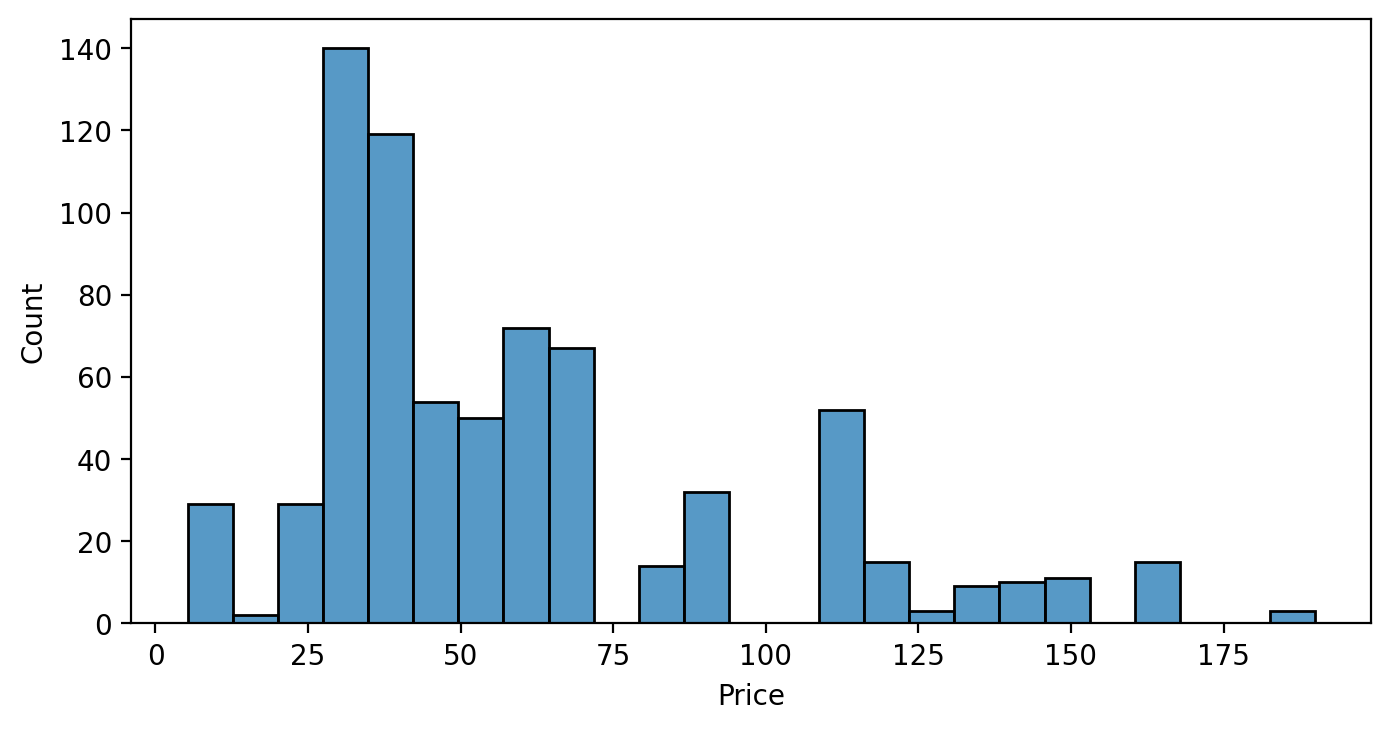

In [38]:
plt.figure(figsize=(8,4),dpi=200)
sns.histplot(x='Price',data=df_nonnull_price[df_nonnull_price['Price']<200],bins=25)

## Map to Show the Number of Launches by Country

In [39]:
from iso3166 import countries

In [40]:
countries.get('kor')

Country(name='Korea, Republic of', alpha2='KR', alpha3='KOR', numeric='410', apolitical_name='Korea, Republic of')

In [41]:
df['Country'] = df['Location'].str.split(', ').str[-1]

In [42]:
df['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [43]:
df['Country'] = df['Country'].replace(['Russia','Shahrud Missile Test Site','New Mexico','Yellow Sea', 
                                       'Pacific Missile Range Facility', 'Pacific Ocean','Barents Sea','Gran Canaria',
                                       'Iran','North Korea','South Korea'],['Russian Federation',
                                       'Iran, Islamic Republic of','USA','China','USA','USA','Russian Federation','USA',
                                       'Iran, Islamic Republic of',"Korea, Democratic People's Republic of",
                                       'Korea, Republic of'])
# change the names to match with iso3166

In [44]:
df['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', "Korea, Democratic People's Republic of",
       'Korea, Republic of', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [45]:
df['Country'].apply(lambda country : countries.get(country)[2])

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: Country, Length: 4323, dtype: object

In [46]:
df['Iso_code'] = df['Country'].apply(lambda country : countries.get(country)[2])

In [47]:
df_launches_Isocode = pd.DataFrame(data=df.groupby(['Iso_code','Country']).size(),columns=['Number_of_Launches']).reset_index()

In [48]:
import plotly.express as px

fig = px.choropleth(data_frame=df_launches_Isocode, locations='Iso_code',
                    color='Number_of_Launches',
                    hover_name='Country',
                    color_continuous_scale='Turbo'
                    )
fig.show()

### 
* A DataFrame to explore the changes in organizations launches over the years 

In [49]:
df.groupby(['Year','Organisation']).size()

Year  Organisation
1957  RVSN USSR        2
      US Navy          1
1958  AMBA             7
      NASA             2
      RVSN USSR        5
                      ..
2020  Roscosmos        4
      SpaceX          14
      ULA              4
      VKS RF           3
      Virgin Orbit     1
Length: 663, dtype: int64

In [50]:
yearly_organisation_launches = pd.DataFrame(data=df.groupby(['Year','Organisation']).size(),
                                 columns=['Yearly_Organisation_Launches']).reset_index()

In [51]:
yearly_organisation_launches.to_csv('yearly_organisation_launches',index=False)

#save the data to make an interactive visualization